In [1]:
#standardising the code with twitter 
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
stop_list = nltk.corpus.stopwords.words('english')
from nltk.stem.porter import *
stemmer = PorterStemmer()

def clean_tweet(reddit):
    if type(reddit) == float:
        return ""
    temp = reddit.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_list]
    #temp = [stemmer.stem(w) for w in temp]
    temp = " ".join(word for word in temp)
    return temp

In [34]:
#use this to take out all the sus numbers
# temp = "ndkjandjknjkdnjkandkjnsf wapow hello"
# temp = temp.split()
# temp =[w for w in temp if not len(w)>20]
# temp

In [2]:
reddit_raw = pd.read_csv('merged_raw_2.csv', lineterminator='\n')
reddit_raw

,Unnamed: 0,subreddit,title,selftext,id,date_created,author,link_flair_richtext,permalink,ups,downs,num_comments,score,total_awards_received,submission,p or c\r
0,0,CardanoNFTs,Cardano NFT Marketplace Projects,Updated: 2/9/2022Added [JPG.store](https://JPG...,mnko80,2021-04-09 16:13:29,TYLRwithspaces,"[{'e': 'text', 't': 'Marketplace'}]",/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,144.0,0.0,260.0,144.0,14.0,mnko80,post\r
1,1,CardanoNFTs,NaN,I'm one of the co-founders of ***NFT-Craze*** ...,gtyvi7w,2021-04-09 19:57:51,Optimal-Role7498,[],/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,19.0,0.0,NaN,19.0,0.0,mnko80,comment\r
2,2,CardanoNFTs,NaN,There needs to be Tokhun.io on this list,hb9geeo,2021-09-02 01:35:55,diarpiiiii,"[{'e': 'text', 't': 'Developer'}]",/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,9.0,0.0,NaN,9.0,1.0,mnko80,comment\r
3,3,CardanoNFTs,NaN,"Hey, I'm the founder of [nft-maker.io](https:/...",gy8awd2,2021-05-15 16:40:51,Padierfind,[],/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,8.0,0.0,NaN,8.0,0.0,mnko80,comment\r
4,4,CardanoNFTs,NaN,Check out [adaminthouse.io](https://adaminthou...,gw0807w,2021-04-27 02:24:21,Cryptogonewild420,[],/r/CardanoNFTs/comments/mnko80/cardano_nft_mar...,5.0,0.0,NaN,5.0,0.0,mnko80,comment\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138984,397852,SolanaNFTs,🎁FREE Cool Cats Solana NFT😻😻😻 for EVERYONE (Wo...,NaN,t3d3ej,2022-02-28 11:03:41,Retouchess,[],/r/SolanaNFTs/comments/t3d3ej/free_cool_cats_s...,0.0,0.0,2.0,0.0,0.0,t3d3ej,post\r
138985,397853,SolanaNFTs,NaN,ADDITIONAL DETAILS TO GUARANTEE YOUR WIN:\r \...,hyrjnqm,2022-02-28 11:04:04,Retouchess,[],/r/SolanaNFTs/comments/t3d3ej/free_cool_cats_s...,1.0,0.0,NaN,1.0,0.0,t3d3ej,comment\r
138986,397854,SolanaNFTs,Claim a free Nifty Records NFT just by joining...,NaN,se2vdl,2022-01-27 16:54:32,ghost_5431,[],/r/SolanaNFTs/comments/se2vdl/claim_a_free_nif...,0.0,0.0,0.0,0.0,0.0,se2vdl,post\r
138987,397855,SolanaNFTs,3 FREE NFT GIVEAWAY - JUST UPVOTE & DROP ADDRESS!,NaN,r8n97m,2021-12-04 10:54:12,Retouchess,[],/r/SolanaNFTs/comments/r8n97m/3_free_nft_givea...,0.0,0.0,2.0,0.0,0.0,r8n97m,post\r


In [6]:
reddit_raw_holder = reddit_raw[["id","ups","downs","num_comments","score","total_awards_received"]]
reddit_raw_holder

,id,ups,downs,num_comments,score,total_awards_received
0,mnko80,144.0,0.0,260.0,144.0,14.0
1,gtyvi7w,19.0,0.0,NaN,19.0,0.0
2,hb9geeo,9.0,0.0,NaN,9.0,1.0
3,gy8awd2,8.0,0.0,NaN,8.0,0.0
4,gw0807w,5.0,0.0,NaN,5.0,0.0
...,...,...,...,...,...,...
138984,t3d3ej,0.0,0.0,2.0,0.0,0.0
138985,hyrjnqm,1.0,0.0,NaN,1.0,0.0
138986,se2vdl,0.0,0.0,0.0,0.0,0.0
138987,r8n97m,0.0,0.0,2.0,0.0,0.0


In [36]:
reddit_raw_crop = reddit_raw[["subreddit","title","selftext","id","submission","p or c\r"]]
reddit_raw_crop

,subreddit,title,selftext,id,submission,p or c\r
0,CardanoNFTs,Cardano NFT Marketplace Projects,Updated: 2/9/2022Added [JPG.store](https://JPG...,mnko80,mnko80,post\r
1,CardanoNFTs,NaN,I'm one of the co-founders of ***NFT-Craze*** ...,gtyvi7w,mnko80,comment\r
2,CardanoNFTs,NaN,There needs to be Tokhun.io on this list,hb9geeo,mnko80,comment\r
3,CardanoNFTs,NaN,"Hey, I'm the founder of [nft-maker.io](https:/...",gy8awd2,mnko80,comment\r
4,CardanoNFTs,NaN,Check out [adaminthouse.io](https://adaminthou...,gw0807w,mnko80,comment\r
...,...,...,...,...,...,...
138984,SolanaNFTs,🎁FREE Cool Cats Solana NFT😻😻😻 for EVERYONE (Wo...,NaN,t3d3ej,t3d3ej,post\r
138985,SolanaNFTs,NaN,ADDITIONAL DETAILS TO GUARANTEE YOUR WIN:\r \...,hyrjnqm,t3d3ej,comment\r
138986,SolanaNFTs,Claim a free Nifty Records NFT just by joining...,NaN,se2vdl,se2vdl,post\r
138987,SolanaNFTs,3 FREE NFT GIVEAWAY - JUST UPVOTE & DROP ADDRESS!,NaN,r8n97m,r8n97m,post\r


In [4]:
merged1 = reddit_raw_crop[["title","selftext"]]
merged2 =  merged1.fillna('')
merged3 = pd.DataFrame()
merged3["combined"]=merged2["title"].astype(str) +" "+ merged2["selftext"].astype(str)
merged3

,combined
0,Cardano NFT Marketplace Projects Updated: 2/9/...
1,I'm one of the co-founders of ***NFT-Craze***...
2,There needs to be Tokhun.io on this list
3,"Hey, I'm the founder of [nft-maker.io](https:..."
4,Check out [adaminthouse.io](https://adamintho...
...,...
138984,🎁FREE Cool Cats Solana NFT😻😻😻 for EVERYONE (Wo...
138985,ADDITIONAL DETAILS TO GUARANTEE YOUR WIN:\r ...
138986,Claim a free Nifty Records NFT just by joining...
138987,3 FREE NFT GIVEAWAY - JUST UPVOTE & DROP ADDRE...


In [5]:
reddit_text_list = merged3['combined'].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_tweet(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
reddit_results_df

,Processed
0,cardano nft marketplace projects updated 2 9 2...
1,im one co founders nft craze also working nft ...
2,needs tokhun io list
3,hey im founder also working expanding platform...
4,check running mostly single mint nfts
...,...
138984,free cool cats solana nft everyone worth 30 00...
138985,additional details guarantee win make sure fol...
138986,claim free nifty records nft joining discord
138987,3 free nft giveaway upvote drop address


In [9]:
reddit_results_df[reddit_results_df.Processed==""]

,Processed
14,
24,
110,
182,
260,
...,...
138922,
138939,
138954,
138957,


In [10]:
merged4 = pd.concat([reddit_raw_crop[["subreddit","id","submission","p or c\r"]],reddit_results_df],axis=1)
merged5 = merged4[merged4["Processed"]!=""]
merged5

,subreddit,id,submission,p or c\r,Processed
0,CardanoNFTs,mnko80,mnko80,post\r,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment\r,check running mostly single mint nfts
...,...,...,...,...,...
138984,SolanaNFTs,t3d3ej,t3d3ej,post\r,free cool cats solana nft everyone worth 30 00...
138985,SolanaNFTs,hyrjnqm,t3d3ej,comment\r,additional details guarantee win make sure fol...
138986,SolanaNFTs,se2vdl,se2vdl,post\r,claim free nifty records nft joining discord
138987,SolanaNFTs,r8n97m,r8n97m,post\r,3 free nft giveaway upvote drop address


In [11]:
merged5.to_csv("merged_cropped_processed_2.csv",index= False)

In [3]:
merged6 = pd.read_csv('merged_cropped_processed_2.csv', lineterminator='\n')
merged6

,subreddit,id,submission,p or c\r,Processed\r
0,CardanoNFTs,mnko80,mnko80,post\r,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list\r
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment\r,check running mostly single mint nfts\r
...,...,...,...,...,...
135842,SolanaNFTs,t3d3ej,t3d3ej,post\r,free cool cats solana nft everyone worth 30 00...
135843,SolanaNFTs,hyrjnqm,t3d3ej,comment\r,additional details guarantee win make sure fol...
135844,SolanaNFTs,se2vdl,se2vdl,post\r,claim free nifty records nft joining discord\r
135845,SolanaNFTs,r8n97m,r8n97m,post\r,3 free nft giveaway upvote drop address\r


In [5]:
def clean_tweet_2(reddit):
    if type(reddit) == float:
        return ""
    temp = reddit.lower()
    temp = temp.split()
    temp =[w for w in temp if not len(w)>15]
    temp = " ".join(word for word in temp)
    return temp

In [6]:
reddit_text_list = merged6['Processed\r'].tolist()
reddit_results_df = pd.DataFrame()

for x in range(len(reddit_text_list)):
#     dict = {'Tweet': reddit_text_list[x],'Processed': clean_tweet(reddit_text_list[x])}
    dict = {'Processed': clean_tweet_2(reddit_text_list[x])}
    reddit_results_df = reddit_results_df.append(dict, ignore_index = True)
# reddit_results_df.to_csv('dataset/SolanaNFTs_top.csv', index=False)
reddit_results_df

,Processed
0,cardano nft marketplace projects updated 2 9 2...
1,im one co founders nft craze also working nft ...
2,needs tokhun io list
3,hey im founder also working expanding platform...
4,check running mostly single mint nfts
...,...
135842,free cool cats solana nft everyone worth 30 00...
135843,additional details guarantee win make sure fol...
135844,claim free nifty records nft joining discord
135845,3 free nft giveaway upvote drop address


In [7]:
merged7 = pd.concat([merged6[["subreddit","id","submission","p or c\r"]],reddit_results_df],axis=1)
# merged5 = merged4[merged4["Processed"]!=""]
# merged5
merged7

,subreddit,id,submission,p or c\r,Processed
0,CardanoNFTs,mnko80,mnko80,post\r,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment\r,check running mostly single mint nfts
...,...,...,...,...,...
135842,SolanaNFTs,t3d3ej,t3d3ej,post\r,free cool cats solana nft everyone worth 30 00...
135843,SolanaNFTs,hyrjnqm,t3d3ej,comment\r,additional details guarantee win make sure fol...
135844,SolanaNFTs,se2vdl,se2vdl,post\r,claim free nifty records nft joining discord
135845,SolanaNFTs,r8n97m,r8n97m,post\r,3 free nft giveaway upvote drop address


In [31]:
merged7["id"][merged7['Processed']==""]
        

84        hdx7rx6
412       hpysiay
413       hpytwry
414       hpyudo4
418       hpz523l
           ...   
135661    hymyaey
135664    hxq8ody
135667    hxg1ue8
135671    hww4pwr
135675    hvk5rqj
Name: id, Length: 48372, dtype: object

In [28]:
merged8 = merged7[merged7['Processed']!=""]
merged8

,subreddit,id,submission,p or c\r,Processed
0,CardanoNFTs,mnko80,mnko80,post\r,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment\r,check running mostly single mint nfts
...,...,...,...,...,...
135842,SolanaNFTs,t3d3ej,t3d3ej,post\r,free cool cats solana nft everyone worth 30 00...
135843,SolanaNFTs,hyrjnqm,t3d3ej,comment\r,additional details guarantee win make sure fol...
135844,SolanaNFTs,se2vdl,se2vdl,post\r,claim free nifty records nft joining discord
135845,SolanaNFTs,r8n97m,r8n97m,post\r,3 free nft giveaway upvote drop address


In [29]:
merged8.to_csv("merged_clean.csv",index= False)

In [3]:
reddit_clean = pd.read_csv('merged_clean.csv', lineterminator='\n')
reddit_clean

,subreddit,id,submission,p or c\r,Processed\r
0,CardanoNFTs,mnko80,mnko80,post\r,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list\r
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment\r,check running mostly single mint nfts\r
...,...,...,...,...,...
87470,SolanaNFTs,t3d3ej,t3d3ej,post\r,free cool cats solana nft everyone worth 30 00...
87471,SolanaNFTs,hyrjnqm,t3d3ej,comment\r,additional details guarantee win make sure fol...
87472,SolanaNFTs,se2vdl,se2vdl,post\r,claim free nifty records nft joining discord\r
87473,SolanaNFTs,r8n97m,r8n97m,post\r,3 free nft giveaway upvote drop address\r


In [10]:
reddit_score_details = reddit_clean.merge(reddit_raw_holder, on='id', how='left')
reddit_score_details.to_csv("merged_clean_scores.csv",index= False)


In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for reddit_text in results['Processed']:
    # split the text into tokens
    tokens = reddit_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "

# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

C:\Users\thine\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


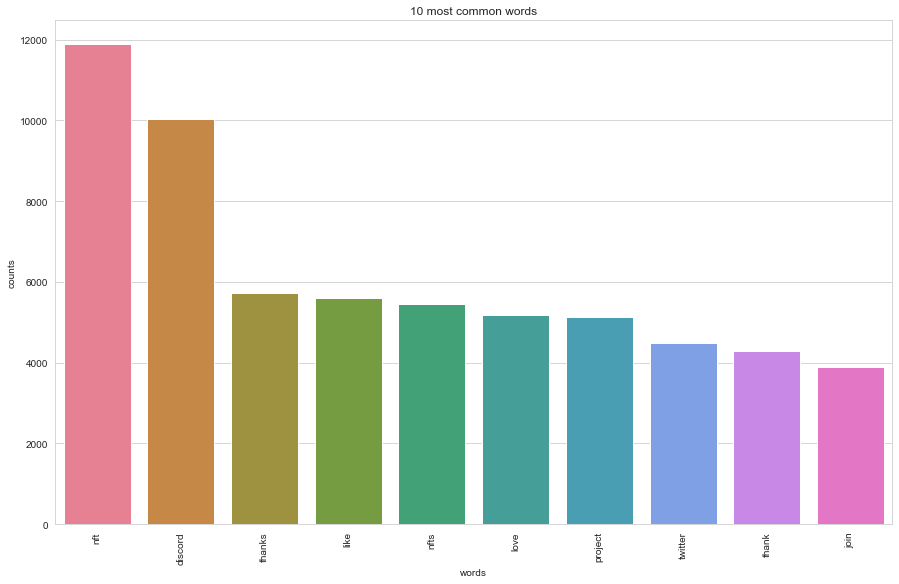

In [14]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(merged5["Processed"])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [10]:
reddit = pd.read_csv('merged_cropped_processed_2.csv', lineterminator='\n')
reddit
reddit.loc[reddit["submission"]=="mnko80"]

,subreddit,id,submission,p or c\r,Processed\r
0,CardanoNFTs,mnko80,mnko80,post\r,cardano nft marketplace projects updated 2 9 2...
1,CardanoNFTs,gtyvi7w,mnko80,comment\r,im one co founders nft craze also working nft ...
2,CardanoNFTs,hb9geeo,mnko80,comment\r,needs tokhun io list\r
3,CardanoNFTs,gy8awd2,mnko80,comment\r,hey im founder also working expanding platform...
4,CardanoNFTs,gw0807w,mnko80,comment\r,check running mostly single mint nfts\r
5,CardanoNFTs,gwx1lze,mnko80,comment\r,burblr gamified marketplace cardano dapp fun a...
6,CardanoNFTs,gx3qco7,mnko80,comment\r,would like mint digital art cardano ada would ...
7,CardanoNFTs,hbdbyju,mnko80,comment\r,add beta artists able list sale open public li...
8,CardanoNFTs,gu12p2j,mnko80,comment\r,somints twitter link points reddit\r
9,CardanoNFTs,gvfoen2,mnko80,comment\r,digital trading cards vr metaverse assets nft ...
